In [ ]:
%load_ext autoreload
%autoreload 2
from phasicdoorkey import PhasicDoorKeyEnv
import matplotlib.pyplot as plt

from scripts.train import train
from scripts.visualize import visualize
from utils.format import train_arg_parser, visualize_arg_parser
from utils.storage import generate_gif
from utils.env import plot_env


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
version = "v0.6"


In [13]:
env_p1 = PhasicDoorKeyEnv(phase=1, size=7, render_mode="rgb_array")
env_p2 = PhasicDoorKeyEnv(phase=2, size=7, render_mode="rgb_array")
env_p3 = PhasicDoorKeyEnv(phase=3, size=7, render_mode="rgb_array")

show_envs = [env_p1, env_p2, env_p3]

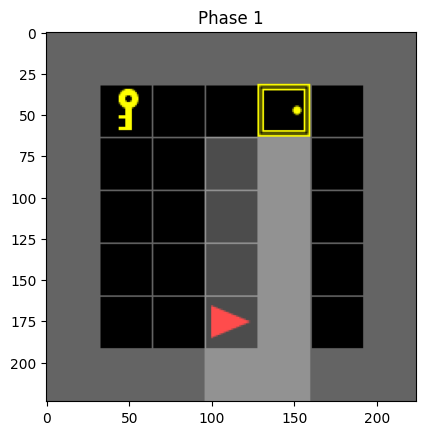

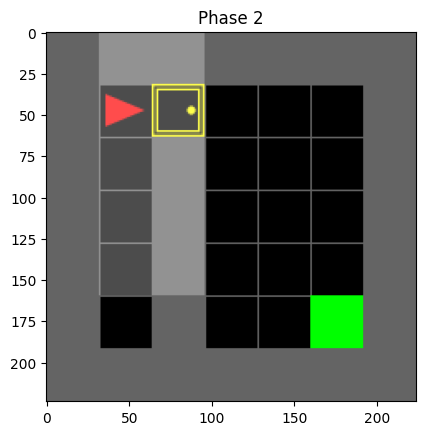

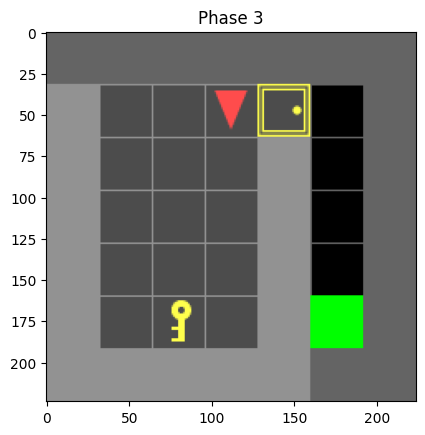

In [14]:
for i, env in enumerate(show_envs):
    plot_env(env, str(i+1))

In [15]:
envs = []
for i in range(3):
    environments = [PhasicDoorKeyEnv(phase=i+1, size=7) for _ in range(100)]
    envs.append(environments)

## Phase 1

In [16]:
train_args = train_arg_parser("ppo", envs[0], model=f"model_{version}", frames=5e5)

train(train_args)

/home/mailv/documents/SPAR_internship/rl_shutdown_venv/lib/python3.10/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"b8a7dab2-eeff-4bd5-a241-2fb090cc9381" --shell=9007 --transport="tcp" --iopub=9009 --f=/root/.local/share/jupyter/runtime/kernel-v2-277BNo9Bn4JpWmr.json

{'algo': 'ppo', 'envs': [<phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa9695e30a0>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529dcc0>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529df00>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529e140>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529e380>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529e5c0>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529e800>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529ea40>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529ec80>, <phasicdoorkey.PhasicDoorKeyEnv object at 0x7fa8d529eec0>, <phasicdoorkey.P

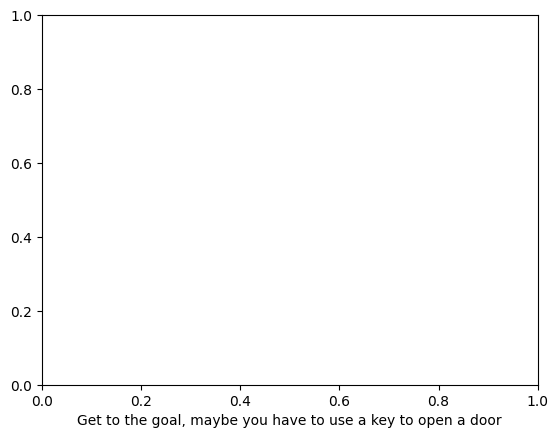

Device: cuda



FileNotFoundError: [Errno 2] No such file or directory: 'storage/model_v0.6/status.pt'

In [79]:
# %%capture  
# # use capture to avoid generating unneeded output
generate_gif(env_p1, phase=1, version=version)

## Phase 2

In [ ]:
train_args = train_arg_parser("ppo", envs[1], model=f"model_{version}", frames=1e6)

train(train_args)

## Phase 3
The agent is not trained anymore in phase 3.

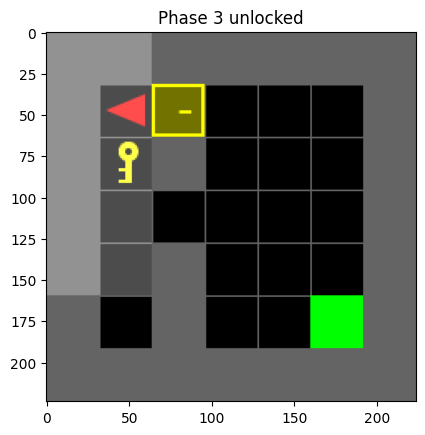

In [18]:
env = PhasicDoorKeyEnv(phase=3, door_locked=True, size=7, max_steps=500, render_mode="rgb_array")
env.reset()
img = env.render()

# Plot the rendered image
plt.imshow(img)
plt.title(name)
plt.show()

In [19]:
%%capture  
# use capture to avoid generating unneeded output

# env = PhasicDoorKeyEnv(phase=1, door_locked=True, size=7, max_steps=100, render_mode="human")
# env.reset()

env_p3_u.render_mode = "human"
env_p3_u.door_locked=True

env.render_mode = "human"
env.reset()
visualize_args = visualize_arg_parser(env, f"model_{version}", gif=f"gifs/gif_{version}", episodes=1)

visualize(visualize_args)

In [68]:
import pandas as pd

In [69]:
df = pd.read_csv("storage/model_v0.3/log.csv")

In [70]:
df.columns

Index(['update', 'frames', 'FPS', 'duration', 'rreturn_mean', 'rreturn_std',
       'rreturn_min', 'rreturn_max', 'num_frames_mean', 'num_frames_std',
       'num_frames_min', 'num_frames_max', 'entropy', 'value', 'policy_loss',
       'value_loss', 'grad_norm', 'return_mean', 'return_std', 'return_min',
       'return_max'],
      dtype='object')

In [72]:
df['return_max'].value_counts()

0.0                    377
return_max              10
0.16300000250339508      2
0.5139999985694885       2
0.7749999761581421       1
0.1720000058412552       1
0.42399999499320984      1
0.6039999723434448       1
0.15399999916553497      1
0.2529999911785126       1
0.19900000095367432      1
0.33399999141693115      1
0.23499999940395355      1
0.3070000112056732       1
0.34299999475479126      1
Name: return_max, dtype: int64